In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
pip install yfinance

In [4]:
start = '2017-01-01'
end = '2022-12-31'

In [28]:
data = yf.download('CL=F PTTEP.BK', start = start ,end=end,period=1)

[*********************100%***********************]  2 of 2 completed


In [29]:
data

Adj Close                  Close                High           \
                 CL=F    PTTEP.BK       CL=F PTTEP.BK       CL=F PTTEP.BK   
Date                                                                        
2017-01-03  52.330002         NaN  52.330002      NaN  55.240002      NaN   
2017-01-04  53.259998   74.474800  53.259998    98.50  53.430000    98.75   
2017-01-05  53.759998   74.096779  53.759998    98.00  54.119999    99.50   
2017-01-06  53.990002   74.474800  53.990002    98.50  54.320000    99.50   
2017-01-09  51.959999   73.907738  51.959999    97.75  53.830002    98.75   
...               ...         ...        ...      ...        ...      ...   
2022-12-26        NaN  174.000000        NaN   174.00        NaN   174.00   
2022-12-27  79.529999  175.000000  79.529999   175.00  81.180000   176.00   
2022-12-28  78.959999  175.000000  78.959999   175.00  79.919998   175.00   
2022-12-29  78.400002  176.000000  78.400002   176.00  78.820000   177.00   
2022-12-30  80.260002  176.500000  80.260002   176.50  80.669998   179.50   

                  Low                Open             Volume              
                 CL=F PTTEP.BK       CL=F PTTEP.BK      CL=F    PTTEP.BK  
Date                                                                      
2017-01-03  52.110001      NaN  54.200001      NaN  727793.0         NaN  
2017-01-04  52.150002    96.00  52.490002    96.25  512641.0  17352200.0  
2017-01-05  52.790001    98.00  53.389999    98.50  517362.0  18246200.0  
2017-01-06  53.320000    97.25  53.730000    98.00  528333.0  11993700.0  
2017-01-09  51.759998    97.50  53.750000    98.50  564893.0   4042300.0  
...               ...      ...        ...      ...       ...         ...  
2022-12-26        NaN   172.00        NaN   172.50       NaN   5720600.0  
2022-12-27  79.160004   174.00  79.900002   174.50  199601.0   8629000.0  
2022-12-28  77.300003   173.00  79.889999   174.00  207717.0   6771600.0  
2022-12-29  76.790001   173.00  78.820000   173.50  199858.0  10445000.0  
2022-12-30  77.709999   176.50  78.730003   177.00  205909.0   8886600.0  

[1556 rows x 12 columns]

In [30]:
df = data['Adj Close']

In [31]:
df

,CL=F,PTTEP.BK
Date,,
2017-01-03,52.330002,NaN
2017-01-04,53.259998,74.474800
2017-01-05,53.759998,74.096779
2017-01-06,53.990002,74.474800
2017-01-09,51.959999,73.907738
...,...,...
2022-12-26,NaN,174.000000
2022-12-27,79.529999,175.000000
2022-12-28,78.959999,175.000000


In [32]:
df.shift(1)

,CL=F,PTTEP.BK
Date,,
2017-01-03,NaN,NaN
2017-01-04,52.330002,NaN
2017-01-05,53.259998,74.474800
2017-01-06,53.759998,74.096779
2017-01-09,53.990002,74.474800
...,...,...
2022-12-26,79.559998,171.500000
2022-12-27,NaN,174.000000
2022-12-28,79.529999,175.000000


In [33]:
df['PTTEP Shift'] = df['PTTEP.BK'].shift(1)

C:\Users\Yanak\AppData\Local\Temp/ipykernel_15516/881189809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PTTEP Shift'] = df['PTTEP.BK'].shift(1)


In [34]:
df

,CL=F,PTTEP.BK,PTTEP Shift
Date,,,
2017-01-03,52.330002,NaN,NaN
2017-01-04,53.259998,74.474800,NaN
2017-01-05,53.759998,74.096779,74.474800
2017-01-06,53.990002,74.474800,74.096779
2017-01-09,51.959999,73.907738,74.474800
...,...,...,...
2022-12-26,NaN,174.000000,171.500000
2022-12-27,79.529999,175.000000,174.000000
2022-12-28,78.959999,175.000000,175.000000


In [35]:
df['return'] = df['PTTEP.BK']/df['PTTEP Shift']-1

C:\Users\Yanak\AppData\Local\Temp/ipykernel_15516/102847901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return'] = df['PTTEP.BK']/df['PTTEP Shift']-1


In [36]:
df

,CL=F,PTTEP.BK,PTTEP Shift,return
Date,,,,
2017-01-03,52.330002,NaN,NaN,NaN
2017-01-04,53.259998,74.474800,NaN,NaN
2017-01-05,53.759998,74.096779,74.474800,-0.005076
2017-01-06,53.990002,74.474800,74.096779,0.005102
2017-01-09,51.959999,73.907738,74.474800,-0.007614
...,...,...,...,...
2022-12-26,NaN,174.000000,171.500000,0.014577
2022-12-27,79.529999,175.000000,174.000000,0.005747
2022-12-28,78.959999,175.000000,175.000000,0.000000


In [37]:
df=data['Adj Close'].pct_change()

In [38]:
df

,CL=F,PTTEP.BK
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.017772,NaN
2017-01-05,0.009388,-0.005076
2017-01-06,0.004278,0.005102
2017-01-09,-0.037600,-0.007614
...,...,...
2022-12-26,0.000000,0.014577
2022-12-27,-0.000377,0.005747
2022-12-28,-0.007167,0.000000


In [39]:
df['PTTEP shift'] = df['PTTEP.BK'].shift(-1)

In [40]:
df

,CL=F,PTTEP.BK,PTTEP shift
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.017772,NaN,-0.005076
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
...,...,...,...
2022-12-26,0.000000,0.014577,0.005747
2022-12-27,-0.000377,0.005747,0.000000
2022-12-28,-0.007167,0.000000,0.005714


In [41]:
df.dropna(inplace=True)

In [42]:
df

,CL=F,PTTEP.BK,PTTEP shift
Date,,,
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
2017-01-10,-0.021940,-0.017903,0.005208
2017-01-11,0.028139,0.005208,0.002591
...,...,...,...
2022-12-23,0.026713,0.002924,0.014577
2022-12-26,0.000000,0.014577,0.005747
2022-12-27,-0.000377,0.005747,0.000000


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP shift'>

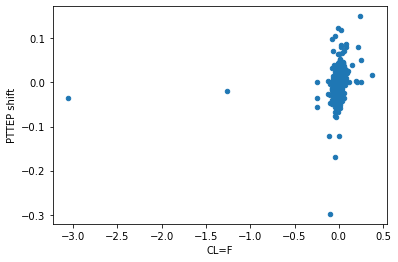

In [43]:
df.plot.scatter(x='CL=F',y='PTTEP shift')

In [44]:
df.loc[df['CL=F']<=0.5]

,CL=F,PTTEP.BK,PTTEP shift
Date,,,
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
2017-01-10,-0.021940,-0.017903,0.005208
2017-01-11,0.028139,0.005208,0.002591
...,...,...,...
2022-12-23,0.026713,0.002924,0.014577
2022-12-26,0.000000,0.014577,0.005747
2022-12-27,-0.000377,0.005747,0.000000


In [45]:
df = df.loc[df['CL=F']>-0.5]

In [46]:
df

,CL=F,PTTEP.BK,PTTEP shift
Date,,,
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
2017-01-10,-0.021940,-0.017903,0.005208
2017-01-11,0.028139,0.005208,0.002591
...,...,...,...
2022-12-23,0.026713,0.002924,0.014577
2022-12-26,0.000000,0.014577,0.005747
2022-12-27,-0.000377,0.005747,0.000000


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP shift'>

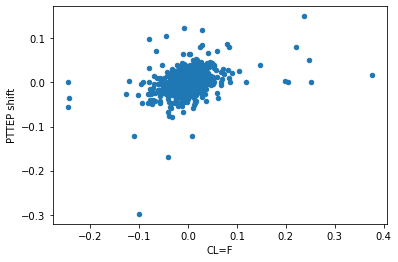

In [47]:
df.plot.scatter(x='CL=F',y='PTTEP shift')

<AxesSubplot:xlabel='Date'>

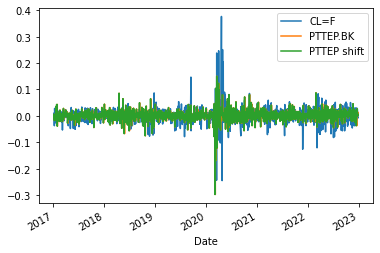

In [48]:
df.plot()

<AxesSubplot:xlabel='Date'>

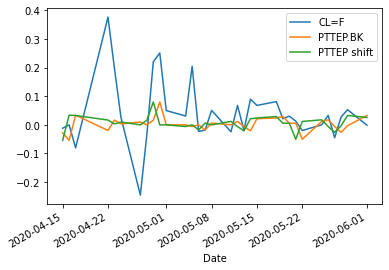

In [49]:
df.loc['2020-04-15':'2020-06-01'].plot()

In [52]:
df

,CL=F,PTTEP.BK,PTTEP shift
Date,,,
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
2017-01-10,-0.021940,-0.017903,0.005208
2017-01-11,0.028139,0.005208,0.002591
...,...,...,...
2022-12-23,0.026713,0.002924,0.014577
2022-12-26,0.000000,0.014577,0.005747
2022-12-27,-0.000377,0.005747,0.000000


In [54]:
df_clean = df.loc[:'2020-04-13'].append(df.loc['2020-05-10':])

C:\Users\Yanak\AppData\Local\Temp/ipykernel_15516/2264704435.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df.loc[:'2020-04-13'].append(df.loc['2020-05-10':])


In [57]:
df_clean.loc['2020-04-12':'2020-05-20']

,CL=F,PTTEP.BK,PTTEP shift
Date,,,
2020-04-13,-0.015378,-0.003135,0.012579
2020-05-11,-0.024252,0.000000,0.012048
2020-05-12,0.067937,0.012048,-0.005952
2020-05-13,-0.019007,-0.005952,-0.020958
2020-05-14,0.089759,-0.020958,0.021407
2020-05-15,0.067852,0.021407,0.023952
2020-05-18,0.081210,0.023952,0.029240
2020-05-19,0.021370,0.029240,0.005682
2020-05-20,0.030462,0.005682,0.005650


<AxesSubplot:xlabel='Date'>

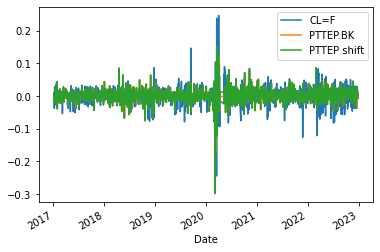

In [58]:
df_clean.plot()

<AxesSubplot:xlabel='CL=F', ylabel='PTTEP shift'>

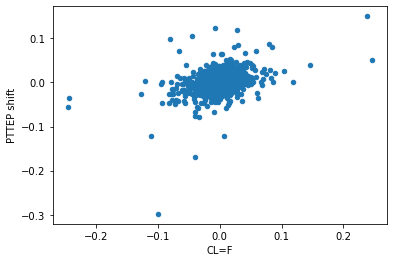

In [59]:
df_clean.plot.scatter(x='CL=F',y='PTTEP shift')

In [60]:
x = df_clean['CL=F']
y = df_clean['PTTEP shift']

In [61]:
m,c = np.polyfit(x,y,1)

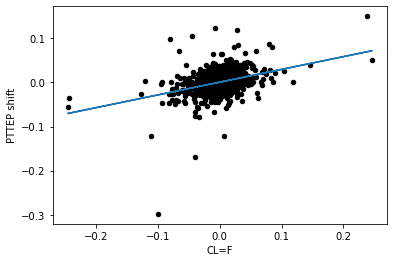

In [62]:
df_clean.plot.scatter(x='CL=F',y='PTTEP shift',c='k')
plt.plot(x,m*x+c)

In [63]:
df_clean.drop('PTTEP.BK',axis=1,inplace=True)

In [64]:
Lower_limit = df_clean.quantile(0.01)
Upper_limit = df_clean.quantile(0.99)

In [65]:
Lower_limit

CL=F          -0.076609
PTTEP shift   -0.047081
Name: 0.01, dtype: float64

In [66]:
(df_clean < Lower_limit) | (df_clean > Upper_limit)

,CL=F,PTTEP shift
Date,,
2017-01-05,False,False
2017-01-06,False,False
2017-01-09,False,False
2017-01-10,False,False
2017-01-11,False,False
...,...,...
2022-12-23,False,False
2022-12-26,False,False
2022-12-27,False,False


In [67]:
df_cleaner = df_clean[~((df_clean < Lower_limit) | (df_clean > Upper_limit))]

In [68]:
df_cleaner

,CL=F,PTTEP shift
Date,,
2017-01-05,0.009388,0.005102
2017-01-06,0.004278,-0.007614
2017-01-09,-0.037600,-0.017903
2017-01-10,-0.021940,0.005208
2017-01-11,0.028139,0.002591
...,...,...
2022-12-23,0.026713,0.014577
2022-12-26,0.000000,0.005747
2022-12-27,-0.000377,0.000000


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP shift'>

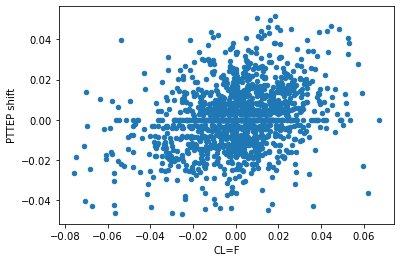

In [85]:
df_cleaner.plot.scatter(x='CL=F',y='PTTEP shift')

In [92]:
df_cleaner.dropna(inplace=True)

In [93]:
df_cleaner

,CL=F,PTTEP shift
Date,,
2017-01-05,0.009388,0.005102
2017-01-06,0.004278,-0.007614
2017-01-09,-0.037600,-0.017903
2017-01-10,-0.021940,0.005208
2017-01-11,0.028139,0.002591
...,...,...
2022-12-23,0.026713,0.014577
2022-12-26,0.000000,0.005747
2022-12-27,-0.000377,0.000000


In [95]:
x2 = df_cleaner['CL=F']
y2 = df_cleaner['PTTEP shift']

In [96]:
x2

Date
2017-01-05    0.009388
2017-01-06    0.004278
2017-01-09   -0.037600
2017-01-10   -0.021940
2017-01-11    0.028139
                ...   
2022-12-23    0.026713
2022-12-26    0.000000
2022-12-27   -0.000377
2022-12-28   -0.007167
2022-12-29   -0.007092
Name: CL=F, Length: 1477, dtype: float64

In [97]:
y2

Date
2017-01-05    0.005102
2017-01-06   -0.007614
2017-01-09   -0.017903
2017-01-10    0.005208
2017-01-11    0.002591
                ...   
2022-12-23    0.014577
2022-12-26    0.005747
2022-12-27    0.000000
2022-12-28    0.005714
2022-12-29    0.002841
Name: PTTEP shift, Length: 1477, dtype: float64

In [98]:
m2,c2 = np.polyfit(x2,y2,1)

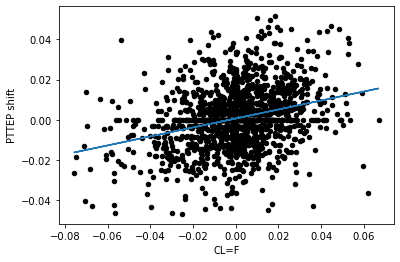

In [100]:
df_cleaner.plot.scatter(x='CL=F',y='PTTEP shift',c='k')
plt.plot(x2,m2*x2+c2)

In [101]:
print('slope='+str(m2))
print('intercept='+str(c2))

slope=0.22281180592299207
intercept=0.0006693594551971712


In [102]:
df_cleaner.corr()

,CL=F,PTTEP shift
CL=F,1.000000,0.299183
PTTEP shift,0.299183,1.000000


<AxesSubplot:xlabel='Date'>

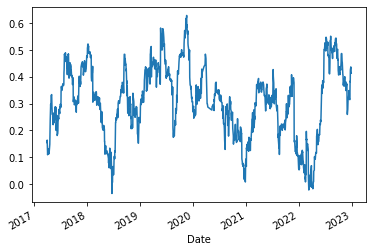

In [104]:
df_cleaner['CL=F'].rolling(60).corr(df_cleaner['PTTEP shift']).plot()

<AxesSubplot:xlabel='Date'>

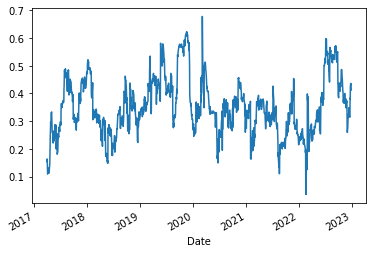

In [105]:
df['CL=F'].rolling(60).corr(df['PTTEP shift']).plot()

In [106]:
df

,CL=F,PTTEP.BK,PTTEP shift
Date,,,
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
2017-01-10,-0.021940,-0.017903,0.005208
2017-01-11,0.028139,0.005208,0.002591
...,...,...,...
2022-12-23,0.026713,0.002924,0.014577
2022-12-26,0.000000,0.014577,0.005747
2022-12-27,-0.000377,0.005747,0.000000
